In [26]:

import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

In [365]:
# Raw Data
df = pd.read_csv('c:/data/ratings.csv')
df.head(5)

,user_id,item_id,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [366]:

# Content Data of Games
df_item = pd.read_csv('c:/data/movies.csv')
df_item.head(4)

,item_id,descripcion,categorias
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance


In [367]:

# Creating a sparse pivot table with users in rows and items in columns
users_items_matrix_df = df.pivot(index   = 'user_id', 
                                 columns = 'item_id', 
                                 values  = 'rating').fillna(0)
users_items_matrix_df.head(100)


#from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler() 
#scaled_values = scaler.fit_transform(users_items_matrix_df) 
#users_items_matrix_df.loc[:,:] = scaled_values

users_items_matrix_df

item_id,0,1,2,3,4,5,6,7,8,9,...,161084,161155,161594,161830,161918,161944,162376,162542,162672,163949
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
670,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
671,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [401]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#Autor : Andy Gonzalez 
def autocodificador(X):

    # Entrada
    input_layer = tf.keras.layers.Input(shape=(X.shape[1],), name='ValoracionUsuarios')
    
    # Codificador
    # -----------------------------
    enc = tf.keras.layers.Dense(512, activation='selu', name='Codificador')(input_layer)

    #Dropout
    # -----------------------------
    lat_space = tf.keras.layers.Dense(256, activation='selu', name='DropOut')(enc)
    lat_space = tf.keras.layers.Dropout(0.1, name='Dropout')(lat_space) # Dropout

    # Decodificador
    # -----------------------------
    dec = tf.keras.layers.Dense(512, activation='selu', name='Decodificador')(lat_space)

    # Salida
    output_layer = tf.keras.layers.Dense(X.shape[1], activation='sigmoid', name='PrediccionUsuarios')(dec)

    # modelo para la reconstrucción de los datos 
    model = keras.Model(input_layer, output_layer)    

    
    
    return model


In [402]:

# input
x_train= users_items_matrix_df.values
y_train = users_items_matrix_df.values

print(x_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 5. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [403]:
model = autocodificador(x_train)


model.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.0001))


hist = model.fit(x=x_train, y=y_train,
                  epochs=100,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.2)

Model: "model_73"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ValoracionUsuarios (InputLay [(None, 9067)]            0         
_________________________________________________________________
Codificador (Dense)          (None, 512)               4642816   
_________________________________________________________________
DropOut (Dense)              (None, 256)               131328    
_________________________________________________________________
Dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
Decodificador (Dense)        (None, 512)               131584    
_________________________________________________________________
PrediccionUsuarios (Dense)   (None, 9067)              4651371   
Total params: 9,557,099
Trainable params: 9,557,099
Non-trainable params: 0
________________________________________________

In [404]:
hist = model.fit(x=x_train, y=y_train,
                  epochs=100,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.1)

Epoch 1/100
10/10 [==============================] - 1s 55ms/step - loss: 0.4107 - recall_16: 0.4950 - val_loss: 0.3609 - val_recall_16: 0.4462
Epoch 2/100
10/10 [==============================] - 0s 23ms/step - loss: 0.3457 - recall_16: 0.4391 - val_loss: 0.2744 - val_recall_16: 0.3694
Epoch 3/100
10/10 [==============================] - 0s 19ms/step - loss: 0.2577 - recall_16: 0.3918 - val_loss: 0.2075 - val_recall_16: 0.3553
Epoch 4/100
10/10 [==============================] - 0s 20ms/step - loss: 0.2159 - recall_16: 0.3824 - val_loss: 0.1885 - val_recall_16: 0.3453
Epoch 5/100
10/10 [==============================] - 0s 21ms/step - loss: 0.2057 - recall_16: 0.3790 - val_loss: 0.1825 - val_recall_16: 0.3502
Epoch 6/100
10/10 [==============================] - 0s 19ms/step - loss: 0.2015 - recall_16: 0.4047 - val_loss: 0.1791 - val_recall_16: 0.3690
Epoch 7/100
10/10 [==============================] - 0s 24ms/step - loss: 0.1989 - recall_16: 0.4224 - val_loss: 0.1771 - val_recall_16:

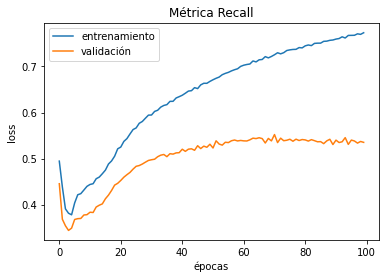

In [408]:
def plot_hist(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('Métrica Recall')
    plt.ylabel('loss')
    plt.xlabel('épocas')
    plt.legend(['entrenamiento', 'validación'], loc='upper left')

    plt.plot(hist.history['recall_16'])
    plt.plot(hist.history['val_recall_16'])
    plt.legend(['entrenamiento', 'validación'], loc='upper left')

plot_hist(hist)




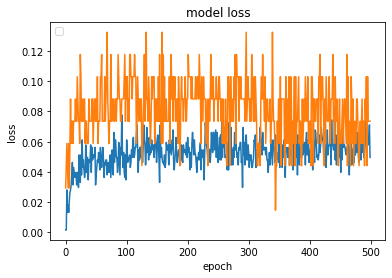

In [153]:
def plot_hist4(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')

    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])

plot_hist4(hist)

In [261]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers





def autoEncoder2(X):

    # Input
    input_layer = tf.keras.layers.Input(shape=(X.shape[1],), name='ValoracionUsuarios')
    
    # Encoder
    # -----------------------------
    enc = tf.keras.layers.Dense(512, activation='relu', name='Codificador')(input_layer)
    enc = tf.keras.layers.Dense(512, activation='relu', name='Codificador2')(enc)

    # Latent Space
    # -----------------------------
    lat_space = tf.keras.layers.Dense(256, activation='selu', name='DropOut')(enc)
    lat_space = tf.keras.layers.Dropout(0.1, name='Dropout')(lat_space) # Dropout

    # Decoder
    # -----------------------------
    dec = tf.keras.layers.Dense(512, activation='selu', name='Decodificador')(lat_space)
    dec = tf.keras.layers.Dense(512, activation='selu', name='Decodificador2')(dec)
    # Output
    output_layer = tf.keras.layers.Dense(X.shape[1], activation='relu', name='PrediccionUsuarios')(dec)

    # this model maps an input to its reconstruction
    model = keras.Model(input_layer, output_layer)    

    
    
    return model

In [281]:
autoenc2 = autoEncoder2(x_train)
autoenc2.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.001))


autoenc2.summary()

autoenc2hist = autoenc2.fit(x=x_train, y=y_train,
                  epochs=100,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.2)

Model: "model_47"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
ValoracionUsuarios (InputLay [(None, 9067)]            0         
_________________________________________________________________
Codificador (Dense)          (None, 512)               4642816   
_________________________________________________________________
Codificador2 (Dense)         (None, 512)               262656    
_________________________________________________________________
DropOut (Dense)              (None, 256)               131328    
_________________________________________________________________
Dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
Decodificador (Dense)        (None, 512)               131584    
_________________________________________________________________
Decodificador2 (Dense)       (None, 512)               262

In [282]:


new_matrix = autoenc2.predict(x_train)

In [283]:
new_matrix

array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 4.995933, 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]],
      dtype=float32)

In [253]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from matplotlib import pyplot as plt

Text(0.5, 0, 'items')

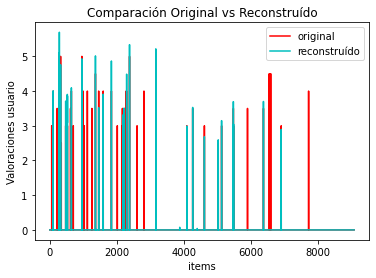

In [288]:

# converting the reconstructed matrix back to a Pandas dataframe
new_users_items_matrix_df  = pd.DataFrame(new_matrix, 
                                          columns = users_items_matrix_df.columns, 
                                          index   = users_items_matrix_df.index)








mse = np.mean(np.power(users_items_matrix_df.iloc[1].to_numpy()-new_users_items_matrix_df.iloc[1].to_numpy(),2))



plt.plot(users_items_matrix_df.iloc[2].to_numpy(),color = "r")
plt.plot(new_users_items_matrix_df.iloc[2].to_numpy(),color = "c")
plt.legend(['original', 'reconstruído'], loc='upper right')
plt.title('Comparación Original vs Reconstruído')
plt.ylabel('Valoraciones usuario')
plt.xlabel('items')
  


Text(0.5, 0, 'items')

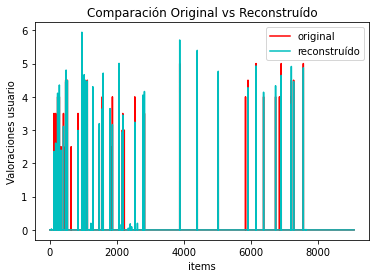

In [291]:



# converting the reconstructed matrix back to a Pandas dataframe
new_users_items_matrix_df  = pd.DataFrame(new_matrix, 
                                          columns = users_items_matrix_df.columns, 
                                          index   = users_items_matrix_df.index)








mse = np.mean(np.power(users_items_matrix_df.iloc[1].to_numpy()-new_users_items_matrix_df.iloc[1].to_numpy(),2))



plt.plot(users_items_matrix_df.iloc[100].to_numpy(),color = "r")
plt.plot(new_users_items_matrix_df.iloc[100].to_numpy(),color = "c")
plt.legend(['original', 'reconstruído'], loc='upper right')
plt.title('Comparación Original vs Reconstruído')
plt.ylabel('Valoraciones usuario')
plt.xlabel('items')

In [166]:
model1 = autoEncoder2(x_train)


model1.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=tf.keras.metrics.Precision())

hist1 = model1.fit(x=x_train, y=y_train,
                  epochs=100,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.1)



Epoch 1/100
10/10 [==============================] - 1s 49ms/step - loss: 0.2276 - precision_10: 0.0000e+00 - val_loss: 0.1929 - val_precision_10: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 18ms/step - loss: 0.2276 - precision_10: 0.0000e+00 - val_loss: 0.1929 - val_precision_10: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 19ms/step - loss: 0.2276 - precision_10: 0.0000e+00 - val_loss: 0.1929 - val_precision_10: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 20ms/step - loss: 0.2276 - precision_10: 0.0000e+00 - val_loss: 0.1929 - val_precision_10: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 20ms/step - loss: 0.2276 - precision_10: 0.0000e+00 - val_loss: 0.1929 - val_precision_10: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 21ms/step - loss: 0.2276 - precision_10: 0.0000e+00 - val_loss: 0.1929 - val_precision_10: 0.0000e+00
Epoch 7/100
10/10 [==============================] -

In [164]:
model1 = autoEncoder2(x_train)


model1.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics='accuracy')

hist1 = model1.fit(x=x_train, y=y_train,
                  epochs=500,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.2)


28 - val_accuracy: 0.0889
Epoch 308/500
9/9 [==============================] - 0s 22ms/step - loss: 0.2160 - accuracy: 0.0855 - val_loss: 0.2528 - val_accuracy: 0.0889
Epoch 309/500
9/9 [==============================] - 0s 22ms/step - loss: 0.2160 - accuracy: 0.0836 - val_loss: 0.2528 - val_accuracy: 0.0889
Epoch 310/500
9/9 [==============================] - 0s 23ms/step - loss: 0.2160 - accuracy: 0.0799 - val_loss: 0.2528 - val_accuracy: 0.0889
Epoch 311/500
9/9 [==============================] - 0s 22ms/step - loss: 0.2160 - accuracy: 0.0762 - val_loss: 0.2528 - val_accuracy: 0.0889
Epoch 312/500
9/9 [==============================] - 0s 22ms/step - loss: 0.2160 - accuracy: 0.0799 - val_loss: 0.2528 - val_accuracy: 0.0889
Epoch 313/500
9/9 [==============================] - 0s 22ms/step - loss: 0.2160 - accuracy: 0.0781 - val_loss: 0.2528 - val_accuracy: 0.0815
Epoch 314/500
9/9 [==============================] - 0s 22ms/step - loss: 0.2160 - accuracy: 0.0781 - val_loss: 0.2528 - v

KeyboardInterrupt: 

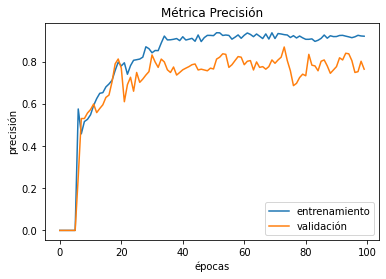

In [306]:

def plot_hist2(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('Métrica Precisión')
    plt.ylabel('precisión')
    plt.xlabel('épocas')
  
    plt.plot(hist.history['precision_10'])
    plt.plot(hist.history['val_precision_10'])
    

    plt.legend(['entrenamiento', 'validación'], loc='lower right')



plot_hist2(hist1)


In [151]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers





def autoEncoder3(X):

    # Input
    input_layer = tf.keras.layers.Input(shape=(X.shape[1],), name='ValoracionUsuarios')
    
    # Encoder
    # -----------------------------
    enc = tf.keras.layers.Dense(512, activation='relu', name='Codificador')(input_layer)

    # Latent Space
    # -----------------------------
    lat_space = tf.keras.layers.Dense(256, activation='relu', name='DropOut')(enc)
    lat_space = tf.keras.layers.Dropout(0.9, name='Dropout')(lat_space) # Dropout

    # Decoder
    # -----------------------------
    dec = tf.keras.layers.Dense(512, activation='relu', name='Decodificador')(lat_space)

    # Output
    output_layer = tf.keras.layers.Dense(X.shape[1], activation='softmax', name='PrediccionUsuarios')(dec)

    # this model maps an input to its reconstruction
    model = keras.Model(input_layer, output_layer)    

    
    
    return model

In [286]:

model2 = autoEncoder3(x_train)


model2.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=tf.keras.metrics.Recall())

hist2 = model2.fit(x=x_train, y=y_train,
                  epochs=100,
                  batch_size=64,
                  shuffle=True,
                  validation_split=0.2)


Epoch 1/100
9/9 [==============================] - 1s 42ms/step - loss: 0.2168 - recall_10: 0.0000e+00 - val_loss: 0.2535 - val_recall_10: 0.0000e+00
Epoch 2/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2168 - recall_10: 0.0000e+00 - val_loss: 0.2535 - val_recall_10: 0.0000e+00
Epoch 3/100
9/9 [==============================] - 0s 19ms/step - loss: 0.2168 - recall_10: 0.0000e+00 - val_loss: 0.2535 - val_recall_10: 0.0000e+00
Epoch 4/100
9/9 [==============================] - 0s 16ms/step - loss: 0.2168 - recall_10: 0.0000e+00 - val_loss: 0.2535 - val_recall_10: 0.0000e+00
Epoch 5/100
9/9 [==============================] - 0s 16ms/step - loss: 0.2168 - recall_10: 0.0000e+00 - val_loss: 0.2535 - val_recall_10: 0.0000e+00
Epoch 6/100
9/9 [==============================] - 0s 18ms/step - loss: 0.2168 - recall_10: 0.0000e+00 - val_loss: 0.2535 - val_recall_10: 0.0000e+00
Epoch 7/100
9/9 [==============================] - 0s 16ms/step - loss: 0.2168 - recall_10: 1.2850e-

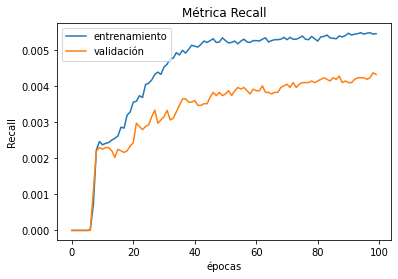

In [298]:

def plot_hist3(hist):
    # summarize history for loss
    fig, ax = plt.subplots()  # create figure & 1 axis

    plt.title('Métrica Recall')
    plt.ylabel('Recall')
    plt.xlabel('épocas')
  

    plt.plot(hist.history['recall_10'])
    plt.plot(hist.history['val_recall_10'])
    plt.legend(['entrenamiento', 'validación'], loc='upper left')

plot_hist3(hist2)


In [308]:
def my_func(x):
    if x >0 and x <1:
        x = x*5
    else:
        x = x
    
    return round(x,3)

def Top5_Recomendaciones(user_id, matrizValoraciones, df_content, topn = 10):
 
    pred_scores = matrizValoraciones.loc[user_id].values

    df_scores   = pd.DataFrame({'item_id': list(users_items_matrix_df.columns), 
                               'valoración': pred_scores})
    
    df_rec      = df_scores.set_index('item_id').join(df_item.set_index('item_id')).sort_values('valoración', ascending=False).head(topn)[['valoración', 'descripcion']]
    df_rec['valoración']=df_rec['valoración'].apply(my_func)
    
    return df_rec[df_rec.rating> 0].sort_values('valoración', ascending=False).head(topn)[['valoración', 'descripcion']]

In [309]:

# Games previously purchased by the user
recommender_for_user(
    user_id         = 573, 
    interact_matrix = users_items_matrix_df, 
    df_content      = df_item)

,rating,descripcion
item_id,,
1094,5.0,"Crying Game, The (1992)"
36,5.0,Dead Man Walking (1995)
2324,5.0,Life Is Beautiful (La Vita è bella) (1997)
527,5.0,Schindler's List (1993)
2997,5.0,Being John Malkovich (1999)
2028,5.0,Saving Private Ryan (1998)
2987,4.0,Who Framed Roger Rabbit? (1988)
1907,4.0,Mulan (1998)
1280,4.0,Raise the Red Lantern (Da hong deng long gao g...


In [310]:
# Recommended User Games
recommender_for_user(
    user_id         = 573, 
    interact_matrix = new_users_items_matrix_df, 
    df_content      = df_item)

,rating,descripcion
item_id,,
1196,4.967,Star Wars: Episode V - The Empire Strikes Back...
1721,3.292,Titanic (1997)
17,3.138,Sense and Sensibility (1995)
2942,2.645,Flashdance (1983)
838,2.607,Emma (1996)
616,2.040,"Aristocats, The (1970)"
858,1.821,"Godfather, The (1972)"
58,1.776,"Postman, The (Postino, Il) (1994)"
1193,1.772,One Flew Over the Cuckoo's Nest (1975)


In [204]:
# Games previously purchased by the user
recommender_for_user(
    user_id         = 671, 
    interact_matrix = users_items_matrix_df, 
    df_content      = df_item)

,rating,descripcion
item_id,,
2291,5.0,Edward Scissorhands (1990)
260,5.0,Star Wars: Episode IV - A New Hope (1977)
318,5.0,"Shawshank Redemption, The (1994)"
2804,5.0,"Christmas Story, A (1983)"
1196,5.0,Star Wars: Episode V - The Empire Strikes Back...
1198,5.0,Raiders of the Lost Ark (Indiana Jones and the...
1,5.0,Toy Story (1995)
1148,5.0,Wallace & Gromit: The Wrong Trousers (1993)
589,5.0,Terminator 2: Judgment Day (1991)


In [292]:
# Recommended User Games
recommender_for_user(
    user_id         = 671, 
    interact_matrix = new_users_items_matrix_df, 
    df_content      = df_item)


,rating,descripcion
item_id,,
6377,4.043,Finding Nemo (2003)
1270,3.961,Back to the Future (1985)
593,3.759,"Silence of the Lambs, The (1991)"
3578,3.528,Gladiator (2000)
2329,3.433,American History X (1998)
2791,3.207,Airplane! (1980)
47,3.160,Seven (a.k.a. Se7en) (1995)
7153,3.072,"Lord of the Rings: The Return of the King, The..."
8636,2.882,Spider-Man 2 (2004)


In [295]:
recommender_for_user(
    user_id         = 672, 
    interact_matrix = users_items_matrix_df, 
    df_content      = df_item)

,rating,descripcion
item_id,,


In [294]:
# Recommended User Games
recommender_for_user(
    user_id         = 672, 
    interact_matrix = new_users_items_matrix_df, 
    df_content      = df_item)

,rating,descripcion
item_id,,
31,2.822,Dangerous Minds (1995)
5991,2.819,Chicago (2002)
3671,2.795,Blazing Saddles (1974)
1339,2.732,Dracula (Bram Stoker's Dracula) (1992)
2336,2.690,Elizabeth (1998)
2109,2.505,"Jerk, The (1979)"
1918,2.388,Lethal Weapon 4 (1998)
524,2.379,Rudy (1993)
3916,2.354,Remember the Titans (2000)


In [238]:

# Group games per user
user_items = df.groupby('user_id')['item_id'].apply(list).reset_index()
user_items.head()

# Split games names
user_items['tokens'] = user_items['item_id']
user_items.head(2)

,user_id,item_id,tokens
0,1,"[31, 1029, 1061, 1129, 1172, 1263, 1287, 1293,...","[31, 1029, 1061, 1129, 1172, 1263, 1287, 1293,..."
1,2,"[10, 17, 39, 47, 50, 52, 62, 110, 144, 150, 15...","[10, 17, 39, 47, 50, 52, 62, 110, 144, 150, 15..."


In [239]:
def plt_reduce(x, color = None):
    '''
    Plot Scatter with color
    '''
    plt.figure(figsize=(6, 6))
    plt.scatter(x[:, 0], x[:, 1], c=color,
            alpha=.4, s=3**2, cmap='tab20c')
    plt.grid(False)
    #plt.colorbar()
    plt.show()

In [254]:


def get_encoder(model):
    '''
    Return Encoder Model from AutoEncoder Model
    '''
    layer_name = 'LatentSpace'
    encoder    = keras.Model(inputs = model.input, outputs = model.get_layer(layer_name).output)
    return encoder

# Encoder Model
encoder      = get_encoder(model)

# Predict - Transform Input in LantentSpace
latent_space = encoder.predict(x_train)

In [255]:

from sklearn.manifold import TSNE

# Reduce dimmension
tsne      = TSNE(n_components=2)
x_reduce  = tsne.fit_transform(latent_space)

In [256]:
def plt_reduce(x, color = None):
    '''
    Plot Scatter with color
    '''
    plt.figure(figsize=(6, 6))
    plt.scatter(x[:, 0], x[:, 1], c=color,
            alpha=.4, s=3**2, cmap='tab20c')
    plt.grid(False)
    #plt.colorbar()
    plt.show()

In [257]:

from sklearn.manifold import TSNE

# Reduce dimmension
tsne      = TSNE(n_components=2)
x_reduce  = tsne.fit_transform(latent_space)

In [ ]:
def extraccion_limpieza (archivo):

In [ ]:
def etiquetas(recomendaciones):


 item_id = recomendaciones.loc[item_id].values
 df_preferencias = cargarPreferencias(recomendaciones.loc[usuario_id].values)
 etiquetas   = pd.DataFrame({'usuario_id': list(recomendaciones.loc[usuario_id].columns), 
                             'url':df_preferencias.loc[tienda_id].values
                             'etiqueta':'#'+df_preferencias.loc[categoria_id].values })
    
 etiquetas      = etiquetas.set_index('usuario_id').join(df_item.set_index('usuario_id')).sort_values('url', ascending=False).head(topn)[['url', 'etiqueta']]
  
    
return etiquetas




